In [2]:
import cv2 
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils # when visualing out poses
mp_pose = mp.solutions.pose

In [16]:
cap = cv2.VideoCapture(0)
## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

## Determining Joints

<img src = "https://mediapipe.dev/images/mobile/pose_tracking_full_body_landmarks.png" style="height:300px">

In [8]:
cap = cv2.VideoCapture(0)
## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
        except:
            pass
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
mp_pose.Pose??

In [ ]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

In [34]:
landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value] # why does this have value even tho it didn't detect it. if visiblility is low, don't save the position

x: 0.6142386
y: 2.3633475
z: -0.65662456
visibility: 0.0020882552

In [22]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.62809384
y: 1.1210781
z: -0.37526324
visibility: 0.41440323

In [23]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]


x: 0.6687571
y: 1.2022107
z: -0.8656362
visibility: 0.36659306

In [24]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]


x: 0.5560192
y: 1.0103874
z: -1.1541002
visibility: 0.3021175

## Calculate Angles

In [11]:
def calculate_angle(a,b,c):
    a = np.array(a) # Frist
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1] - b[1], c[0] -b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0/np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle

In [39]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [ ]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [6]:
cap = cv2.VideoCapture(0)
## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]    
            
            # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
            
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualizeq
            cv2.putText(image, 
                        str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)), # controal [640, 480] to window size
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        except:
            pass
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

## Curl Counter


In [14]:
cap = cv2.VideoCapture(0)

## Curl counter variables
counter = 0
stage = None

## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]    
            
            # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
            
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize
            cv2.putText(image, 
                        str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)), # controal [640, 480] to window size
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage == 'down':
                stage = 'up'
                counter += 1
                print(counter) 
        except:
            pass
        
        # Render curl counter
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        cv2.putText(image, 'REPS', (15,20), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
        cv2.putText(image, str(counter),
                    (10,70),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10


## Visualize angle vs frame

In [3]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'angle')

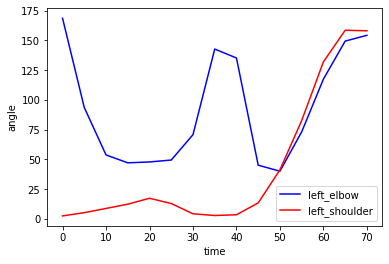

In [25]:


cap = cv2.VideoCapture("Steph Curry.mp4")

# Curl counter variables
# counter = 0
# stage = None

times = []
time = 0
left_elbow_angles = []
left_shoulder_angles = []
## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        if not ret:
            cap.release()
            break
        
        frame_width = int(cap.get(3))
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # print(left_shoulder)
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]    
            
            # shoulder angle
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # print(left_hip)
            
            # left_ = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

            # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
            
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            
            if time % 5 == 0:
                left_elbow_angles.append(left_elbow_angle)
                # print(left_elbow_angle)
                left_shoulder_angles.append(left_shoulder_angle)
                
                times.append(time)
            time+=1
            
            # Visualize
            cv2.putText(image, 
                        str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)), # controal [640, 480] to window size
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        except:
            pass
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    
    cap.release()
    cv2.destroyAllWindows()
    
plt.plot(times, left_elbow_angles, color='b', label = 'left_elbow')
plt.plot(times, left_shoulder_angles, color='r', label='left_shoulder')
plt.legend()

plt.xlabel('time')
plt.ylabel('angle')
